# Database creation
This file is used to play with the data and once the objective is reached, functions will be written in .py files in order to be used by the model part of the project.

In [1]:
from astropy.io import fits
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataset_creation_utils import *
# Retrieve the contrast curves from the database
path_db = 'C:/Users/ludin/Documents/Master Thesis/Dataset_creation/SPHERE_DC_DATA/'
foldername = '2MASS J01543773+0043005_DB_H23_2014-10-07_ird_specal_dc_cADI_softsorting_200967/'
filename = 'ird_specal_dc-IRD_SPECAL_CONTRAST_CURVE_TABLE-contrast_curve_tab.fits'

if not os.path.exists(path_db):
    print('ERROR! Folder {} does not exist.'.format(path_db)) # exit doesn't print anything in jupyter notebook

if not os.path.exists(os.path.join(path_db, foldername)):
    print('ERROR! Folder {} does not exist.'.format(foldername))

if not os.path.exists(os.path.join(path_db, foldername, filename)):
    print('ERROR! File {} does not exist.'.format(filename))

# Example of how to read a fits file
with fits.open(os.path.join(path_db, foldername, filename)) as hdul:
    data = hdul[1].data #numpy record
    print(data.dtype)
    print(hdul[1].header['DATE-OBS'])
    print(hdul[1].data['TARGET_NAME'])



(numpy.record, [('TARGET_NAME', 'S3'), ('LAM', 'S10'), ('PIXSCALE', 'S10'), ('NSIGMA', 'S3'), ('REPERTORY', 'S55'), ('SEPARATION', '>f4', (1148,)), ('NSIGMA_CONTRAST', '>f4', (1148,))])
2014-10-08T05:51:18.0343
['FS4' 'FS4' 'FS4']


In [2]:
df = get_df_with_headers(path_db, ['ESO OBS ID', 'DATE-OBS', 'OBJECT'], interpolate=True, compute_summary=False, write_headers=False, compute_plots=False, max_sep=10)
df

,folder,ESO OBS ID,DATE-OBS,OBJECT,SEPARATION,NSIGMA_CONTRAST
0,++ CVN 3B_DB_H23_2018-09-14_ird_specal_dc_cADI...,2177825,2018-09-15T07:33:22.60,CD-52 381,"[0.006105000153183937, 0.030420974449882253, 0...","[0.07546933740377426, 0.07712596848056678, 0.0..."
1,++ KOH 78_DB_H23_2016-04-03_ird_specal_dc_cADI...,1182440,2016-04-04T07:59:57.8491,ScoPMS_048,"[0.006105000153183937, 0.030420974449882253, 0...","[0.024168867617845535, 0.013727830975673552, 0..."
2,++ SKF 1501_DB_H23_2015-04-11_ird_specal_dc_cA...,1182371,2015-04-12T07:15:49.8435,HIP_76629,"[0.006105000153183937, 0.030420974449882253, 0...","[0.01883835159242153, 0.008466474323989774, 0...."
3,1RXS J184646.0-363621_DB_H23_2018-07-04_ird_sp...,1962017,2018-07-05T01:24:56.95,RXJ1846,"[0.006105000153183937, 0.030420974449882253, 0...","[0.13829022645950317, 0.12528548200099757, 0.0..."
4,1RXS J184646.0-363621_DB_H23_2018-07-04_ird_sp...,1962017,2018-07-05T01:24:56.95,RXJ1846,"[0.006105000153183937, 0.030420974449882253, 0...","[0.13829022645950317, 0.12528548200099757, 0.0..."
...,...,...,...,...,...,...
509,TYC 7692-2943-2_DB_H23_2019-03-19_ird_specal_d...,2296758,2019-03-20T02:23:21.23,TYC 7692-2943-2,"[0.006105000153183937, 0.030420974449882253, 0...","[0.021788790822029114, 0.01076361939993451, 0...."
510,TYC 7692-2943-2_DB_H23_2019-03-24_ird_specal_d...,2296758,2019-03-25T02:18:36.93,TYC 7692-2943-2,"[0.006105000153183937, 0.030420974449882253, 0...","[0.011126062832772732, 0.0070464837691727195, ..."
511,TYC 8092-1574-2_DB_H23_2016-10-01_ird_specal_d...,1424674,2016-10-02T08:50:23.1564,HIP 28153,"[0.006105000153183937, 0.030420974449882253, 0...","[0.030811656266450882, 0.007723410447323252, 0..."
512,TYC 8097-337-1_DB_H23_2018-10-31_ird_specal_dc...,2028801,2018-11-01T07:33:29.10,TYC 8097-337-1,"[0.006105000153183937, 0.030420974449882253, 0...","[0.011241959407925606, 0.0068635571590479495, ..."


In [3]:
# Print the types of the columns
print(df.dtypes)

folder             object
ESO OBS ID          int64
DATE-OBS           object
OBJECT             object
SEPARATION         object
NSIGMA_CONTRAST    object
dtype: object


In [4]:
# Print the length of the separation vector
print(len(df['SEPARATION'][0]))

412


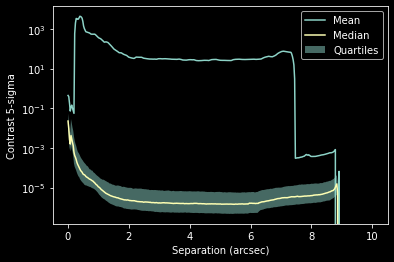

In [5]:
plot_contrast_curves_summary(path_db, df)